<a href="https://colab.research.google.com/github/TyeshaNeppalli/Data-Visualization-_2/blob/master/DataVisualisation_CA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify interactive visuals using Altair

In [0]:
import pandas as pd
import altair as alt
import io
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Spotify filtered data.csv to Spotify filtered data.csv


In [0]:
spotify = pd.read_csv(io.StringIO(uploaded['Spotify filtered data.csv'].decode('latin-1')))

In [0]:
pts = alt.selection(type="single", encodings=['x'])

rect = alt.Chart(spotify).mark_rect().encode(
    alt.X('energy:Q', bin=True),
    alt.Y('acousticness:Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Records')
    )
).properties(
    title="Acousticness vs energy based on Genre"
)

circ = rect.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()',
        legend=alt.Legend(title='Records in Selection')
    )
).transform_filter(
    pts
)

bar = alt.Chart(spotify).mark_bar().encode(
    x='genre:N',
    y='count()',
    color=alt.condition(pts, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
).properties(
    width=550,
    height=140 
).add_selection(pts)

alt.vconcat(
    rect + circ,
    bar
).resolve_legend(
    color="independent",
    size="independent"
)

alt.VConcatChart(...)

The figure above shows the relation between the acoustiness and loudness based on the genre. It is an interactive plot. The circles show the number of records and the size changes with the number. We can see that the for classical music the acousticness is quite high and the energy is quite low. Similarly, for Hip Hop the energy is high but the acousticness is low. This shows the energy and acoustiness have different values for different genres.

In [0]:
slider = alt.binding_range(min=2015, max=2018, step=1)
select_time_signature = alt.selection_single(name='Song Year', fields=['Song Year'],
                                   bind=slider, init={'Song Year': 2018})

base = alt.Chart(spotify).add_selection(
    select_time_signature
).transform_filter(
    select_time_signature
).transform_calculate(
    md=alt.expr.if_(alt.datum.mode== 1, 'mode=1', 'mode=0')
).properties(
    width=250, title="Key vs Count"
)


color_scale = alt.Scale(domain=['mode=1', 'mode=0'],
                        range=['#1f77b4', '#e377c2'])

left = base.transform_filter(
    alt.datum.md == 'mode=1'
).encode(
    y=alt.Y('key', axis=None),
    x=alt.X('count()',
            sort=alt.SortOrder('descending')),
    color=alt.Color('md:N', scale=color_scale, legend=None)
).mark_bar().properties(title='mode=1')

middle = base.encode(
    y=alt.Y('key', axis=None),
    text=alt.Text('key'),
).mark_text().properties(width=20)

right = base.transform_filter(
    alt.datum.md == 'mode=0'
).encode(
    y=alt.Y('key', axis=None),
    x=alt.X('count()'),
    color=alt.Color('md:N', scale=color_scale, legend=None)
).mark_bar().properties(title='mode=0')

alt.concat(left, middle, right, spacing=5)

alt.ConcatChart(...)

The above plot shows relation between key, count and two modes. In year 2018, number of songs with mode 0, using key "A" are 8, while songs with mode 1 using key "A" are 30 , Showing that the count of songs with major (mode =1 ) are larger as compared to minor (mood = 0)

In [0]:
pip install plotly.express

     |████████████████████████████████| 7.1MB 2.7MB/s 
  Found existing installation: plotly 3.6.1
    Uninstalling plotly-3.6.1:
      Successfully uninstalled plotly-3.6.1


In [0]:
import plotly.express as px

data1=spotify[(spotify.genre == 'Hip Hop') | (spotify.genre == 'Jazz') | (spotify.genre == 'Rock')]
fig = px.scatter_3d(data1, x='danceability', y='energy', z='liveness',
              color='genre', title="Danceability , Energy , Liveness for different Genre")

fig.show()

Figure above is a 3D plot between liveness, energy and danceability for 3 genres which are Rock, Hip Hop and Jazz. We can see that the values of each genre are quite distributed. For Hip Hop we can see that it has higher values of danceability, energy. Jazz has lower value of energy, liveness but higher values of danceability. Rock music has higher of danceability, energy and liveness as compared to the remaining two genres.

In [0]:
input_dropdown = alt.binding_select(options=['Aaron Watson','Johann Sebastian Bach','Wisin & Yandel','Suren Bagratuni','Kyle Park'])
selection = alt.selection_single(fields=['artist'], bind=input_dropdown, name='Song')
color = alt.condition(selection,
                    alt.Color('artist:N', legend=None),
                    alt.value('lightgray'))

alt.Chart(spotify).mark_line().encode(
    x='danceability',
    y='energy',
    color=color
).add_selection(
    selection
).transform_filter(
    selection
).properties(title="Top 5 Artists based on energy and danceability")

alt.Chart(...)

The above visual of line plot informs us about the energy and danceability of top 5 artists from the Spotify dataset taken. Energy percentage is plotted against the danceability rate. Songs by Winsin & Yandel are more dancable  and energetic than others with a danceability rate reaching to  0.88 and energy percentage more than 9.

In [0]:
scale = alt.Scale(domain=['0','1','2','-1','-2'],
                  range=['#e7ba52', '#a7a7a7', '#aec7e8', '#1f77b4', '#9467bd'])
color = alt.Color('positivity_level:N', scale=scale)

# We create two selections:
# - a brush that is active on the top panel
# - a multi-click that is active on the bottom panel
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])

# Top panel is scatter plot of temperature vs time
points = alt.Chart().mark_point().encode(
    alt.X('loudness', title='loudness'),
    alt.Y('liveness',
        title='liveness'
    ),
    color=alt.condition(brush, color, alt.value('lightgray')),
    size=alt.Size('energy')
).properties(
    width=550,
    height=250
).add_selection(
    brush
).transform_filter(
    click
)

# Bottom panel is a bar chart of weather type
bars = alt.Chart().mark_bar().encode(
    x='count()',
    y='positivity_level',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties(
    width=550,
    height=240
).add_selection(
    click
)

alt.vconcat(
    points,
    bars,
    data=spotify,
    title="Liveness vs Loudness of song based on positivity_level"
)

alt.VConcatChart(...)

Above is the interactive plot  between Liveness, loudness and positivity level with energy being shown as the size of the circles. When the positivity level is neutral (0) we can see that the loudness is towards 0 with average value of -5 and the liveness is below 0.4. When the positivity level is negative (-1) we can see that the loudness is distributed with the average value of -8 and the liveness is scattered and energy is quite high.

In [0]:
stripplot =  alt.Chart(spotify, width=40).mark_circle(size=8).encode(
    x=alt.X(
        'jitter:Q',
        title= None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale(),
    ),
    y=alt.Y('energy:Q'),
    color=alt.Color('mood:N', legend=None),
    column=alt.Column(
        'mood:N',
        header=alt.Header(
            labelAngle=-90,
            titleOrient='top',
            labelOrient='bottom',
            labelAlign='right',
            labelPadding=3,
            title = 'Energy of the song based on mood'
        ),
    ),
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

stripplot

alt.Chart(...)

In the above graph, the mood of the songs are plotted based on their energy level. Each song mood has different energy levels with some outliers. The energy level is marked from 0 - 1. The songs in the aggressive mood are in the highest energy level and the sentimental songs with the lowest energy level.

In [0]:
alt.Chart(spotify).mark_boxplot().encode(
    x='Song Year:N',
    y='tempo:Q',
    color = 'Ratings'
).properties(
width = 400,
 title='Tempo selection over time and their ratings')

alt.Chart(...)

The boxplot gives a clear view of the tempo of songs for every year from 2015 - 2018 and sorting them with their ratings. We can see that the taste of people for the beats changes year by year with some exceptions. For the year 2018, most of the songs in the tempo 90-130 has poor ratings and for the tempo with 130-160 excellent ratings has been received.

In [0]:
alt.Chart(spotify).mark_point().encode(
    alt.X('Song Year', scale=alt.Scale(zero=False)),
    alt.Y('mood', scale=alt.Scale(zero=False, padding=1)),
    color='Ratings',
    size='positivity_level').properties(title="Ratings and Positive level on song mood and year")

alt.Chart(...)

The above graph is a point plot. Here, mood is plotted against song year, with ratings as the filling and positivity level as the size of the points. In year 2017, songs that were Lively were given rating as "Very Good".

In [0]:
alt.Chart(spotify).mark_bar().encode(
    x="mood",
    y="energy_level",
    color=alt.condition(
        alt.datum.energy_level > 0,
        alt.value("steelblue"),  # The positive color
        alt.value("orange")  # The negative color
    )
).properties(width=600 , title = "Energy_level for different moods")

alt.Chart(...)

In the above bar plot, we can see that the energy_level is positive for 3 moods aggressive, energizing and lively as compared to cool, melancholy, romantic and sentimental for which they had negative energy_levels with melancholy and sentimental being most negative with the score of -2.

Text(0.5, 1.0, 'Corelation Plot')

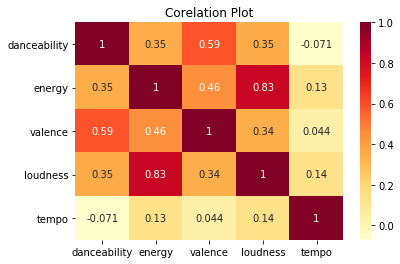

In [0]:
import seaborn as sns 
Correlation=spotify[['danceability','energy','valence','loudness','tempo']]
sns.heatmap(Correlation.corr(),annot=True,cmap="YlOrRd").set_title('Corelation Plot')

Above is the correlation plot between the different measures of the tracks. We can see that danceability and valance have quite a good relation. Also, loudness and energy are very much related. Danceability and tempo are negatively related that means they are quite opposite to each other. Almost all the measures are positively related except for the danceability and tempo. 

In [0]:
bars = alt.Chart(spotify).mark_bar().encode(
    x='count()',
    y='genre',
    color='mood',
    order=alt.Order(
      # Sort the segments of the bars by this field
      'count()',
      sort='ascending'
    )
).properties(
  width=800,
title = 'No of songs in a genre based on mood')

bars

alt.Chart(...)

The above graph segregates the songs present in spotify music app based on its genre and mood. The genre is placed along the Y axis by highlighting the mood of the songs in different color. From the graph we can see that the genre '**reggae**' has more number of songs and the genre '**classical**' with the least. Hip Hop and reggae contains more songs that can be listened when the mood is cool. And we can also find that sentimental songs are more from the genre '**Jazz**'.

In [0]:
top = alt.Chart(spotify).mark_square(size=200).encode(
    x=alt.X('liveness:Q', scale=alt.Scale(zero=False)),
    y=alt.Y('energy_level:Q', scale=alt.Scale(zero=False)),
    color='mood:N',
    tooltip='mood:N'
).properties(
    width=400, height=200, title="Liveness based on Energy level and Mood"
)

bottom = alt.Chart(spotify).mark_bar().encode(
    x=('liveness'),
    y=('mood')
).properties(
    width=400, height=100
)

alt.vconcat(top, bottom)

alt.VConcatChart(...)

The above plot is a concatenation of Square and bar graphs. Liveness is ploted against mood and energy level. From the square plot it is visible that, moods of songs above 0.8 of liveness are mostly Energizing, Empowering, Cool, Melancholy and Romantic. It shows that majority songs are of empowering mood backed by energizing.